In [1]:
from os import getcwd
from os.path import abspath, join

import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.colors as mpc
import numpy as np
import pickle

from src.data.load_dataset import load_mnist, load_kmnist

In [2]:
## set the matplotlib params
mpl.rcParams['xtick.major.size'] = 14
mpl.rcParams['ytick.major.size'] = 14
mpl.rcParams['xtick.major.width'] = 2
mpl.rcParams['ytick.major.width'] = 2
mpl.rcParams['ytick.minor.width'] = 0
mpl.rcParams['xtick.direction'] = 'inout'
mpl.rcParams['ytick.direction'] = 'inout'
mpl.rcParams['axes.linewidth'] = 2
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False

# set plotting params
s, f = 5, 2
models = ['V1', 'classical', 'incompatible']
colors = {'V1': '#2c7fb8', 'classical': '#d95f02', 'incompatible': '#91cf60'}

In [3]:
data_dir = abspath(join(getcwd(), '../../'))

### Load saved classification results

In [4]:
load_dir = data_dir + '/models/results'
with open(load_dir + '/mnist_clf/mnist_clf_s=%0.2f_f=%0.2f_estimator.pickle' % (s, f), 'rb') as handle:
    mnist = pickle.load(handle)
    
with open(load_dir + '/mnist_clf/mnist_clf_s=%0.2f_f=%0.2f_fewshot_estimator.pickle' % (s, f), 'rb') as handle:
    mnist_fewshot = pickle.load(handle)
    
with open(load_dir + '/kmnist_clf/kmnist_clf_s=%0.2f_f=%0.2f_estimator.pickle' % (s, f), 'rb') as handle:
    kmnist = pickle.load(handle)
    
with open(load_dir + '/kmnist_clf/kmnist_clf_s=%0.2f_f=%0.2f_fewshot_estimator.pickle' % (s, f), 'rb') as handle:
    kmnist_fewshot = pickle.load(handle)

#### Plot MNIST digits

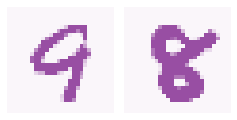

In [5]:
# plot mnist digits
train_loader, _, _ = load_mnist(seed=2)
images, labels = next(iter(train_loader))
images, labels = images.squeeze().numpy(), labels.numpy()

# create a custom colormap
cmap = mpc.LinearSegmentedColormap.from_list("", ['#ffffff', '#984ea3'])

fig = plt.figure(figsize=(4, 2))
for i in range(2):
    ax = fig.add_subplot(1, 2, i + 1)
    plt.imshow(images[i + 4], cmap=cmap)
    plt.clim(-0.5, 1)
    plt.axis('off')
plt.subplots_adjust(wspace=0.1, hspace=0.1)
# plt.savefig(data_dir + '/reports/figures/paper_figs/figure_7/mnist_image.pdf', 
#             dpi=300, transparent=True, 
#             bbox_inches = 'tight', pad_inches = 0)

#### Plot classification results on full MNIST dataset

V1, (68, 11.9020)
classical, (68, 23.4560)
incompatible, (68, 25.7740)


(-30.0, 1000.0)

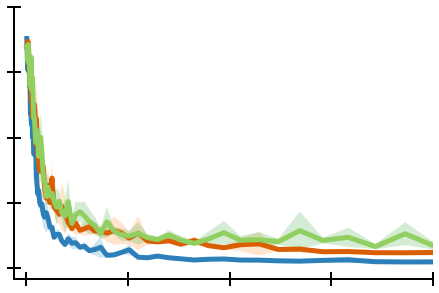

In [8]:
fig = plt.figure(figsize=(7.5, 5))
ax = fig.add_subplot(111)
for m in models:
    n_features = mnist[m]['hidden_size']
    avg_test_err = 1 - np.array(mnist[m]['mean'])
    std_err = mnist[m]['std_err']
    plt.plot(n_features, avg_test_err, label=m, lw=5, c=colors[m])
    plt.fill_between(n_features, avg_test_err - std_err, avg_test_err + std_err, alpha=0.2)
    print('%s, (%s, %0.4f)' % (m, n_features[32], avg_test_err[32] * 100))

# axes limits and ticks
plt.yticks(np.arange(0, 1.01, 0.25))
plt.ylim([-0.04, 1.00])
ax.set_xticklabels([])
ax.set_yticklabels([])
plt.xticks(np.arange(0, 2200, 250))
plt.xlim([-30, 1000])
# plt.legend(loc = 'upper right', fontsize=30)
# plt.savefig(data_dir + '/reports/figures/paper_figs/figure_7/mnist_results.pdf', 
#             dpi=300, transparent=True, 
#             bbox_inches = 'tight', pad_inches = 0)

#### Plot classification results on MNIST dataset in fewshot regime

V1, (68, 35.7640)
classical, (68, 43.4600)
incompatible, (68, 55.7220)


(-20.0, 1000.0)

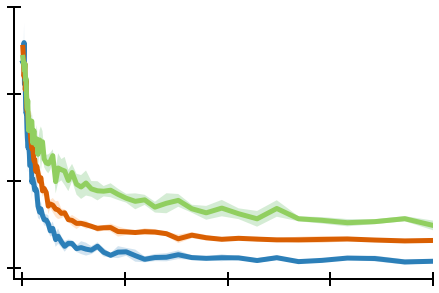

In [10]:
fig = plt.figure(figsize=(7.5, 5))
ax = fig.add_subplot(111)
for m in models:
    n_features = mnist_fewshot[m]['hidden_size']
    avg_test_err = 1 - np.array(mnist_fewshot[m]['mean'])
    std_err = mnist_fewshot[m]['std_err']
    plt.plot(n_features, avg_test_err, label=m, lw=5, c=colors[m])
    plt.fill_between(n_features, avg_test_err - std_err, avg_test_err + std_err, alpha=0.2)
    print('%s, (%s, %0.4f)' % (m, n_features[32], avg_test_err[32] * 100))


# axes limits and ticks
plt.yticks(np.arange(0, 1.01, 0.25))
plt.ylim([0.22, 1.00])
ax.set_xticklabels([])
ax.set_yticklabels([])
plt.xticks(np.arange(0, 2200, 250))
plt.xlim([-20, 1000])
# plt.savefig(data_dir + '/reports/figures/paper_figs/figure_7/mnist_fewshot_results.pdf', 
#             dpi=300, transparent=True, 
#             bbox_inches = 'tight', pad_inches = 0)

#### Plot KMNIST digits

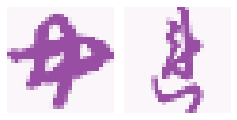

In [11]:
# plot kmnist digits
train_loader, _, _ = load_kmnist(seed=2)
images, labels = next(iter(train_loader))
images, labels = images.squeeze().numpy(), labels.numpy()

# create a custom colormap
cmap = mpc.LinearSegmentedColormap.from_list("", ['#ffffff', '#984ea3'])

fig = plt.figure(figsize=(4, 2))
for i in range(2):
    ax = fig.add_subplot(1, 2, i + 1)
    plt.imshow(images[i + 4], cmap=cmap)
    plt.clim(-0.5, 1)
    plt.axis('off')
plt.subplots_adjust(wspace=0.1, hspace=0.1)
# plt.savefig(data_dir + '/reports/figures/paper_figs/figure_7/kmnist_image.pdf', 
#             dpi=300, transparent=True, 
#             bbox_inches = 'tight', pad_inches = 0)

#### Plot classification results on KMNIST dataset

V1, (68, 47.2440)
classical, (68, 57.0840)
incompatible, (68, 65.9000)


(-30.0, 1000.0)

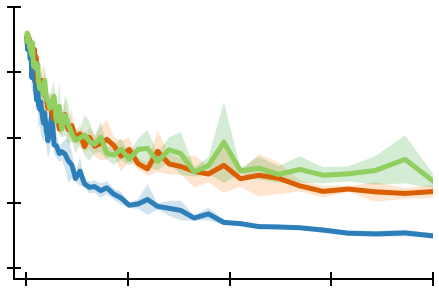

In [14]:
fig = plt.figure(figsize=(7.5, 5))
ax = fig.add_subplot(111)
for m in models:
    n_features = kmnist[m]['hidden_size']
    avg_test_err = 1 - np.array(kmnist[m]['mean'])
    std_err = kmnist[m]['std_err']
    plt.plot(n_features, avg_test_err, label=m, lw=5, c=colors[m])
    plt.fill_between(n_features, avg_test_err - std_err, avg_test_err + std_err, alpha=0.2)
    print('%s, (%s, %0.4f)' % (m, n_features[32], avg_test_err[32] * 100))


# axes limits and ticks
plt.yticks(np.arange(0, 1.01, 0.25))
plt.ylim([-0.04, 1.00])
ax.set_xticklabels([])
ax.set_yticklabels([])
plt.xticks(np.arange(0, 2200, 250))
plt.xlim([-30, 1000])
# plt.savefig(data_dir + '/reports/figures/paper_figs/figure_7/kmnist_results.pdf', 
#             dpi=300, transparent=True, 
#             bbox_inches = 'tight', pad_inches = 0)

#### Plot classification results on the KMNIST dataset in the fewshot regime

V1, (68, 66.1520)
classical, (68, 73.2980)
incompatible, (68, 73.4580)


(-30.0, 1000.0)

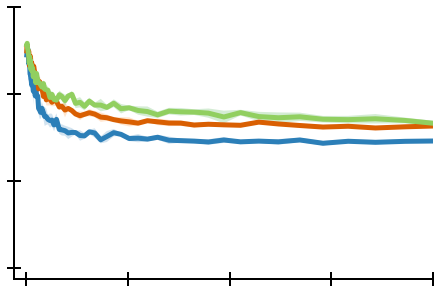

In [17]:
fig = plt.figure(figsize=(7.5, 5))
ax = fig.add_subplot(111)
for m in models:
    n_features = kmnist_fewshot[m]['hidden_size']
    avg_test_err = 1 - np.array(kmnist_fewshot[m]['mean'])
    std_err = kmnist_fewshot[m]['std_err']
    plt.plot(n_features, avg_test_err, label=m, lw=5, c=colors[m])
    plt.fill_between(n_features, avg_test_err - std_err, avg_test_err + std_err, alpha=0.2)
    print('%s, (%s, %0.4f)' % (m, n_features[32], avg_test_err[32] * 100))


# axes limits and ticks
plt.yticks(np.arange(0, 1.01, 0.25))
plt.ylim([0.22, 1.00])
ax.set_xticklabels([])
ax.set_yticklabels([])
plt.xticks(np.arange(0, 2200, 250))
plt.xlim([-30, 1000])
# plt.savefig(data_dir + '/reports/figures/paper_figs/figure_7/kmnist_fewshot_results.pdf', 
#             dpi=300, transparent=True, 
#             bbox_inches = 'tight', pad_inches = 0)